In [58]:
#The project was developed through jupyter interactive environment which is based on Python 3.
#Jupyter notebook could be accessed through Anaconda navigator system. 
#More information can be found in https://docs.anaconda.com/anaconda/install/
#Biopython package will be needed to handle this project. Install it if its not installed yet.
#pip install biopython
#jupyter notebook

In [59]:
#To read and manipulate the sequences, seqIO should be imported. fasta file will be read through this sequences.

from Bio import SeqIO

In [60]:
fasta = list(SeqIO.parse('seqs.fasta', format = 'fasta'))

In [61]:
#fasta will show the list of contents 
fasta

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TGA'), id='B.1.1.7|Alpha', name='B.1.1.7|Alpha', description='B.1.1.7|Alpha', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='B.1.351|Beta', name='B.1.351|Beta', description='B.1.351|Beta', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGAAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='P.1|Gamma', name='P.1|Gamma', description='P.1|Gamma', dbxrefs=[]),
 SeqRecord(seq=Seq('TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCT...ATA'), id='B.1.617|Delta', name='B.1.617|Delta', description='B.1.617|Delta', dbxrefs=[]),
 SeqRecord(seq=Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA'), id='B.1.1.529|Omicron', name='B.1.1.529|Omicron', description='B.1.1.529|Omicron', dbxrefs=[])

In [62]:
#All of the sequences name 
for entry in fasta:
    print(entry.id)

Wuhan_strain
B.1.1.7|Alpha
B.1.351|Beta
P.1|Gamma
B.1.617|Delta
B.1.1.529|Omicron


In [63]:
#Making a dictionary for the sequences and make it a loop for the entry id 
seqs = {}
for entry in fasta:
    seqs[entry.id] = entry

In [64]:
seqs['Wuhan_strain']

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[])

In [65]:
seqs['Wuhan_strain'].seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [66]:
for entry in fasta:
    print(len(entry.seq))

29903
29694
29885
29903
29789
29684


In [67]:
#The lengths are not identical. To align the sequences, we will use the command line aligner called mafft.
#If not installed, install it.
#conda install -c biocore mafft 
#Using mafft make a new aligned sequence file.
!mafft seqs.fasta > seqs_ali.fasta


nseq =  6
distance =  ktuples
iterate =  0
cycle =  2
sparsepickup = 0
nguidetree = 2
nthread = 0
sueff_global = 0.100000
generating a scoring matrix for nucleotide (dist=200) ... done
done
done
scoremtx = -1
Gap Penalty = -1.53, +0.00, +0.00

tuplesize = 6, dorp = d


Making a distance matrix ..

There are 29 ambiguous characters.
    1 / 6
done.

Constructing a UPGMA tree ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5 f
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5 f
done.

disttbfast (nuc) Version 7.245 alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been

In [68]:
fasta = list(SeqIO.parse('seqs_ali.fasta', format = 'fasta'))

In [69]:
for entry in fasta:
    print(entry.id)

Wuhan_strain
B.1.1.7|Alpha
B.1.351|Beta
P.1|Gamma
B.1.617|Delta
B.1.1.529|Omicron


In [70]:
seqs = {}
for entry in fasta:
    seqs[entry.id] = entry

In [71]:
seqs['Wuhan_strain']

SeqRecord(seq=Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[])

In [72]:
seqs['Wuhan_strain'].seq

Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa')

In [73]:
    print(len(entry.seq))

29912


In [74]:
#Spike protein coding region starts from 21563 to 25384
#Function for the gapped region & loop over the nucleotides
def gapped_pos(seq, pos):
    non_gap = 0
    gaps = 0
    for nt in seq:
        if nt != '-':
            non_gap += 1
        else:
            gaps += 1
        if non_gap == pos:
            return pos + gaps

In [75]:
gapped_pos(seqs['Wuhan_strain'].seq, 21563)

21563

In [76]:
gapped_pos(seqs['Wuhan_strain'].seq, 25384)

25393

In [77]:
#Dictionary for spike protein coding gene 
spikes = {}
for seq in fasta:
    spikes[seq.id] = seq.seq[21563-1:25393]

In [78]:
#Double check the alignments and new dictionary. 
for spike in spikes:
    print(spikes[spike][0:10])

atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt


In [79]:
# Comparing two sequences and finding out the mutations
"""In this case, new function will zip the initial reference sequences and the corresponding variant sequences 
together into a new object called seqs. This will make a list of tuples and that list of tuples will be looped over.
"""
def get_mutations(initial, variant):
    seqs = list(zip(initial, variant))
    for pos, nt in enumerate(seqs):
        if nt[0] != nt[1]:
            print(nt[0].upper() + str(pos) + nt[1].upper())

In [80]:
get_mutations(spikes['Wuhan_strain'], spikes['B.1.1.7|Alpha'])

T202-
A203-
C204-
A205-
T206-
G207-
T428-
T429-
A430-
A1509T
C1717A
A1849G
C2050A
C2155T
T2952G
G3360C


In [81]:
get_mutations(spikes['Wuhan_strain'], spikes['B.1.1.529|Omicron'])

C199T
T202-
A203-
C204-
A205-
T206-
G207-
C283T
G424-
T425-
G426-
T427-
T428-
T429-
A430-
T431-
T432-
A631-
T632-
T633-
-642G
-643A
-644G
-645C
-646C
-647A
-648G
-649A
-650A
G1024A
T1119C
C1120T
T1125C
C1132T
G1259T
T1328G
G1344A
G1438A
C1441A
A1459C
A1486G
G1494A
A1501G
A1509T
T1521C
C1648A
A1849G
C1971T
T2045G
C2050A
C2300A
G2394T
C2576A
A2870T
T2915A
C2949T
C3446T


In [82]:
#Getting rid of the nucleotides
"""Using the translate function of Biopython to convert the nucleotides to amino acid sequences
"""
with open('spikes.fasta', 'w') as f:
    for spike in spikes:
        out = spikes[spike].replace('-', '').translate()
        f.write('>' + spike + '\n')
        f.write(str(out).upper()+'\n')

In [83]:
!ls

Proposal.md
README.md
Spike Protein Mutation Between SARS CoV-2 Strains.ipynb
output_38_0.png
seqs.fasta
seqs_ali.fasta
spikes.fasta
spikes_ali.fasta


In [84]:
#aligning amino acid sequences
!mafft spikes.fasta > spikes_ali.fasta


nseq =  6
distance =  ktuples
iterate =  0
cycle =  2
sparsepickup = 0
nguidetree = 2
nthread = 0
sueff_global = 0.100000
done.
scoremtx = 1
Gap Penalty = -1.53, +0.00, +0.00

tuplesize = 6, dorp = p


Making a distance matrix ..
    1 / 6
done.

Constructing a UPGMA tree ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5 f
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5 f
done.

disttbfast (aa) Version 7.245 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To

In [85]:
spikes_aa = list(SeqIO.parse('spikes_ali.fasta', format = 'fasta'))

In [86]:
spikes_aa

[SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.1.7|Alpha', name='B.1.1.7|Alpha', description='B.1.1.7|Alpha', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.351|Beta', name='B.1.351|Beta', description='B.1.351|Beta', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='P.1|Gamma', name='P.1|Gamma', description='P.1|Gamma', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.617|Delta', name='B.1.617|Delta', description='B.1.617|Delta', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.1.529|Omicron', name='B.1.1.529|Omicron', description='B.1.1.529|Omicron', dbxrefs=[])

In [87]:
seqs = {}
for entry in spikes_aa:
    seqs[entry.id] = entry.seq

In [88]:
seqs['Wuhan_strain']

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')

In [89]:
#Using the same nucleotide mutation functional arguements getting a list for the mutation

def get_aa_mutations(initial, variant):
    out = []
    seqs = list(zip(initial, variant))
    for pos, aa in enumerate(seqs):
        if aa[0] != aa[1]:
            out.append(aa[0].upper() + str(pos) + aa[1].upper())
    return out

In [90]:
len(get_aa_mutations(seqs['Wuhan_strain'], seqs['B.1.617|Delta']))

10

In [91]:
len(get_aa_mutations(seqs['Wuhan_strain'], seqs['B.1.1.529|Omicron']))

39

In [92]:
get_aa_mutations(seqs['Wuhan_strain'], seqs['B.1.1.529|Omicron'])

['A66V',
 'H68-',
 'V69-',
 'T94I',
 'G141D',
 'V142-',
 'Y143-',
 'Y144-',
 'N210-',
 'L211I',
 '-214E',
 '-215P',
 '-216E',
 'G341D',
 'S373L',
 'S375P',
 'S377F',
 'K419N',
 'N442K',
 'G448S',
 'S479N',
 'T480K',
 'E486A',
 'Q495R',
 'G498S',
 'Q500R',
 'N503Y',
 'Y507H',
 'T549K',
 'D616G',
 'H657Y',
 'N681K',
 'P683H',
 'N766K',
 'D798Y',
 'N858K',
 'Q956H',
 'N971K',
 'L983F']

In [93]:
#A list for each amino acid position mutation in each strains
for item in seqs:
    print(item + ' '+str(len(get_aa_mutations(seqs['Wuhan_strain'], seqs[item]))))

Wuhan_strain 0
B.1.1.7|Alpha 10
B.1.351|Beta 10
P.1|Gamma 12
B.1.617|Delta 10
B.1.1.529|Omicron 39


In [94]:
#Illustrating the difference
#matplotlib will be installed if not
#pip install matplotlib
import matplotlib.pyplot as plt

In [95]:
"""This will make a library of mutation the same way earlier part of this script worked.
Mutated amino acid sequences will be ploted according to their position comparing to the 
reference genome. 
"""
mutations = {}
for item in seqs:
    mutations[item] = get_aa_mutations(seqs['Wuhan_strain'], seqs[item])

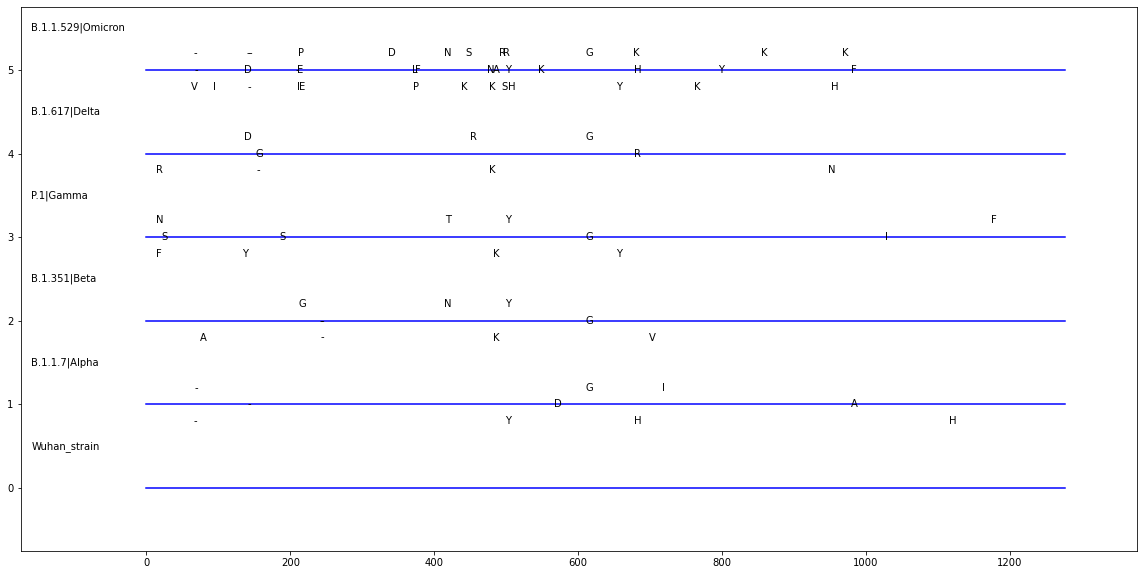

In [96]:
plt.figure(figsize = (20,10))
for y, item in enumerate(seqs):
    plt.plot((0,len(seqs['Wuhan_strain'])), (y,y), color = 'blue')
    plt.text(-160, y+.5, item, va = 'center', ha = 'left')
    
    for yy, mutation in enumerate(mutations[item]):
        pos = int(mutation[1:-1])
        aa_change = mutation[-1]
        if yy%3 == 0:
            plt.text(pos, y-.2, aa_change, va = 'center', ha = 'center')
        elif yy%2 == 0:
            plt.text(pos, y, aa_change, va = 'center', ha = 'center')
        else:
            plt.text(pos, y+.2, aa_change, va = 'center', ha = 'center')
    
    plt.xlim(-175, len(seqs['Wuhan_strain']) + 100)
    plt.ylim(-.75, 5.75)